In [1]:
!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

In [4]:
data=pd.read_csv("C:/Users/user/OneDrive/Desktop/CapstoneProject/MultipleDiseaseApp/parkinsons - parkinsons.csv")

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data.shape

(195, 24)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
data["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

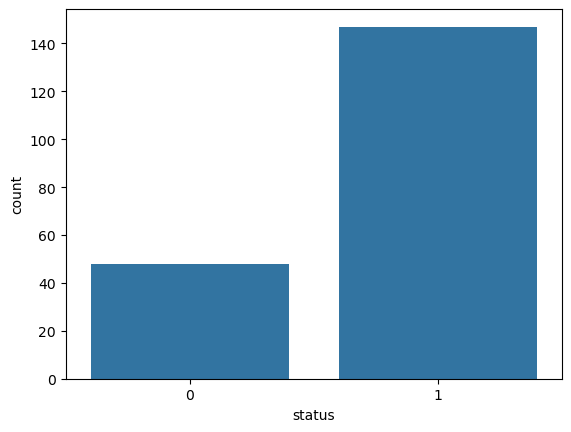

In [11]:
sns.countplot(x='status',data=data)

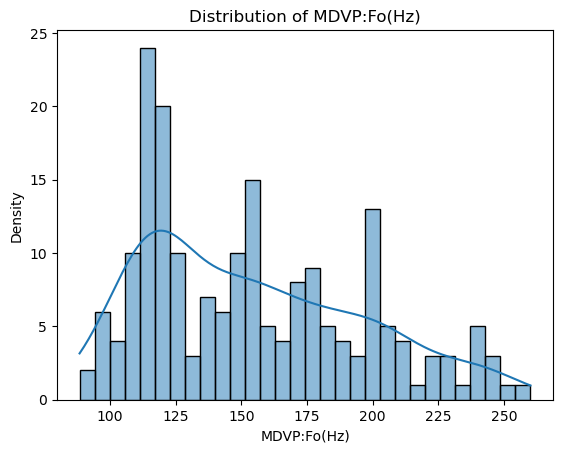

In [12]:
sns.histplot(data['MDVP:Fo(Hz)'], kde=True, bins=30)
plt.title("Distribution of MDVP:Fo(Hz)")
plt.xlabel("MDVP:Fo(Hz)")
plt.ylabel("Density")
plt.show()

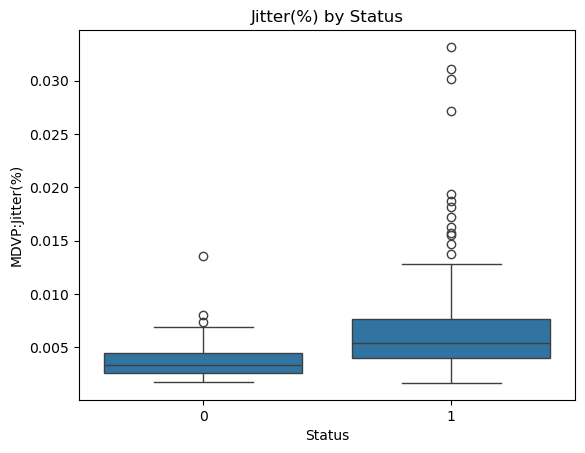

In [13]:
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=data)
plt.title("Jitter(%) by Status")
plt.xlabel("Status")
plt.ylabel("MDVP:Jitter(%)")
plt.show()

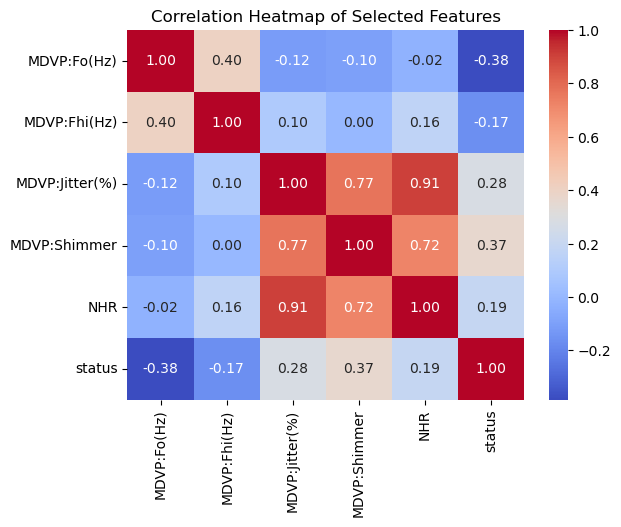

In [14]:
top_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'status']
corr = data[top_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

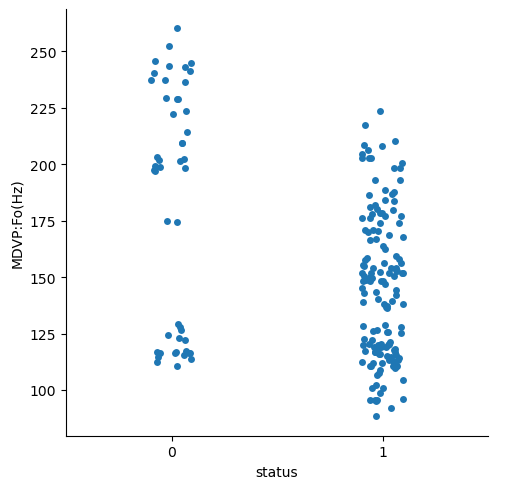

In [15]:
sns.catplot(x = "status", y = "MDVP:Fo(Hz)", data = data)

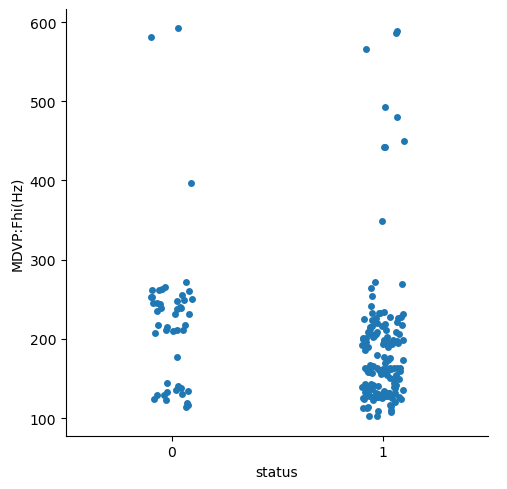

In [16]:
sns.catplot(x = "status", y = "MDVP:Fhi(Hz)", data = data)

In [17]:
x=data.drop(columns=['name','status'],axis=1)
y=data['status']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [20]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [22]:
 logistic_model.predict(x_test)
 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [23]:
logistic_model.score(x_test,y_test)

0.8974358974358975

In [24]:
y_hat =  logistic_model.predict(x_test)

acc = accuracy_score(y_test,y_hat)
prec = precision_score(y_test,y_hat)
rec = recall_score(y_test,y_hat)


print(f"accuracy : {acc}")
print(f"precision : {prec}")
print(f"recall : {rec}")

accuracy : 0.8974358974358975
precision : 0.8888888888888888
recall : 1.0


In [27]:

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
dt.score(x_test,y_test)

0.9230769230769231

In [34]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(
                        estimator=DecisionTreeClassifier(),
                        n_estimators=7
                        )

bc.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=7)

In [35]:
bc.score(x_test,y_test)

0.8974358974358975

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=40)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [32]:
rfc.score(x_test,y_test)

0.9487179487179487

In [36]:
y_hat =  rfc.predict(x_test)

acc = accuracy_score(y_test,y_hat)
prec = precision_score(y_test,y_hat)
rec = recall_score(y_test,y_hat)


print(f"accuracy : {acc}")
print(f"precision : {prec}")
print(f"recall : {rec}")

accuracy : 0.9487179487179487
precision : 0.9411764705882353
recall : 1.0


In [37]:
from sklearn.metrics import roc_curve , roc_auc_score

y_prob = rfc.predict_proba(x_test)

In [38]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])

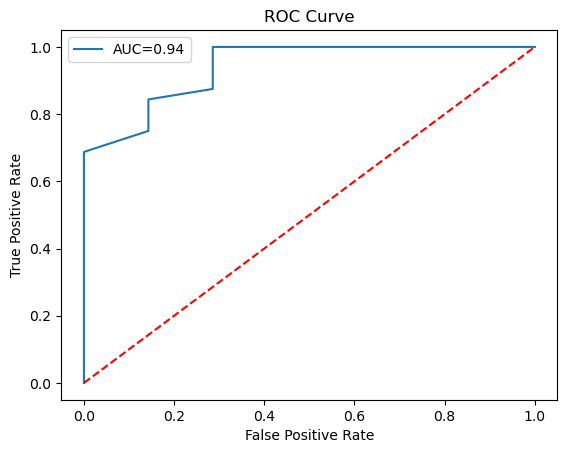

In [39]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

XGB Regressor

In [42]:
regressor_model = XGBRegressor()

In [43]:
regressor_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [44]:
training_data_prediction = regressor_model.predict(x_train)

score_1 = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", score_1)

score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9999983906745911
Mean Absolute Error :  0.00029119994724169374


In [45]:
test_data_prediction = regressor_model.predict(x_test)

score_1 = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", score_1)

score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.4572603106498718
Mean Absolute Error :  0.10882270336151123


In [46]:
import pickle

In [47]:
filename = "parkinsons_disease_model.sav"
model = RandomForestClassifier()
model.fit(x_train, y_train)

with open("rfc.score.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!
